In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import statsmodels.api as sm

In [2]:
bikeshare=pd.read_csv('day.csv')

In [3]:
bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bikeshare.shape

(730, 16)

In [5]:
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bikeshare.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
bikeshare.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [8]:
# converting season and weathersit to categorical strings
bikeshare['season']= bikeshare['season'].map({1 : 'spring', 2 : 'summer', 3: 'fall', 4: 'winter'})


In [9]:
bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
bikeshare['weathersit']=bikeshare['weathersit'].map({1 : 'clear', 2 : 'mist', 3: 'lightsnow', 4: 'heaveyrain'})

In [11]:
bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
bikeshare.describe()

,instant,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.500000,6.526027,0.028767,2.997260,0.683562,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,0.500343,3.450215,0.167266,2.006161,0.465405,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,0.000000,4.000000,0.000000,1.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,0.500000,7.000000,0.000000,3.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,1.000000,10.000000,0.000000,5.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,1.000000,12.000000,1.000000,6.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [13]:
# visualising numerical variables
cont_cols=['yr','mnth','holiday','weekday','workingday','temp','atemp','hum','windspeed','casual','registered']

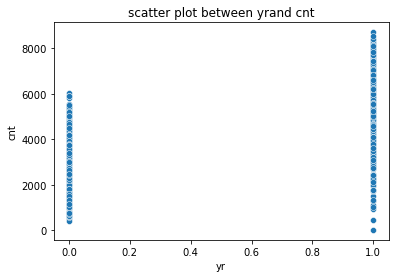

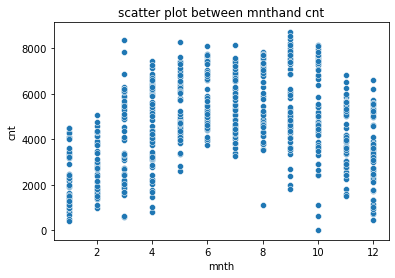

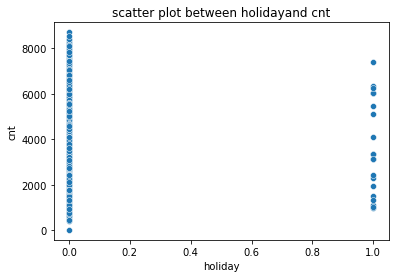

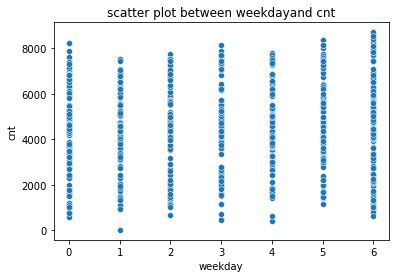

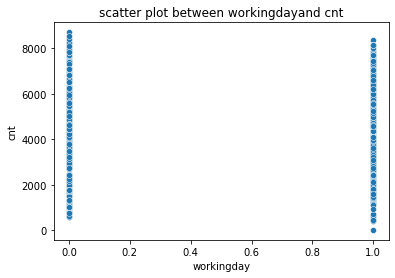

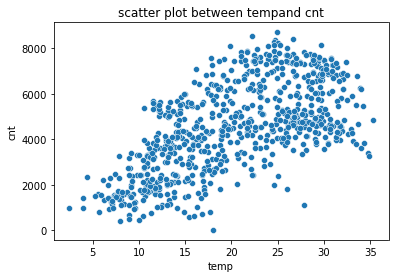

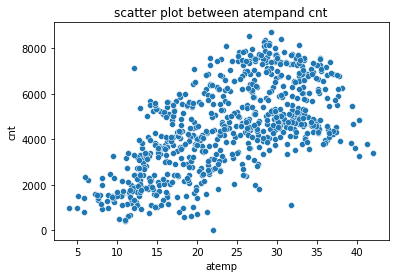

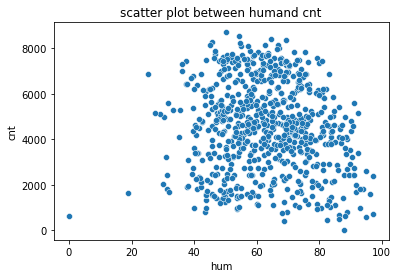

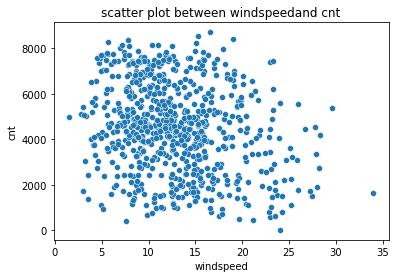

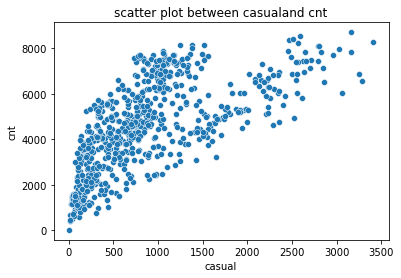

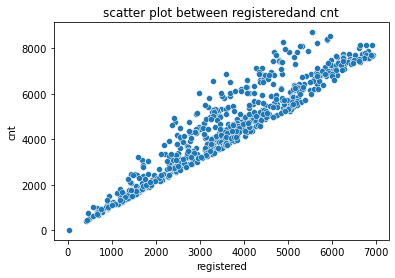

In [14]:
for i in cont_cols:
    sns.scatterplot(bikeshare[i], bikeshare['cnt'])
    plt.title('scatter plot between '+i +'and cnt')
    plt.show()

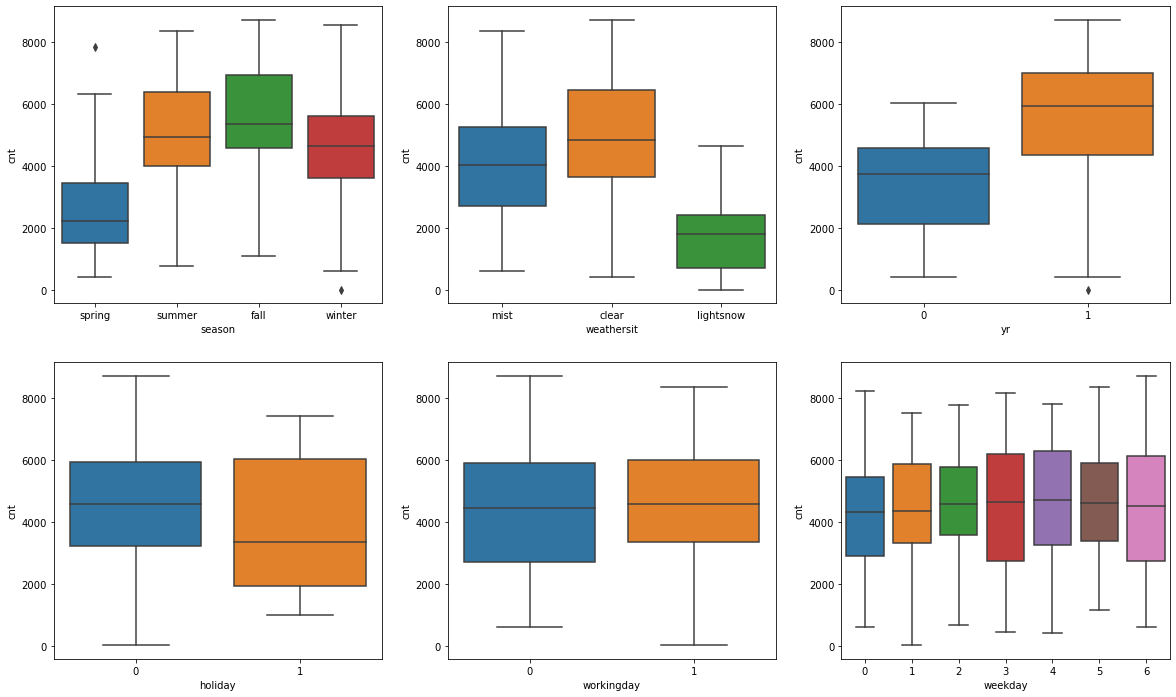

In [15]:
cat_cols=['season','weathersit','yr','holiday','workingday','weekday']
# visualising categorical variables
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=bikeshare)

plt.subplot(2,3,2)
sns.boxplot(x='weathersit',y='cnt',data=bikeshare)

plt.subplot(2,3,3)
sns.boxplot(x='yr',y='cnt',data=bikeshare)

plt.subplot(2,3,4)
sns.boxplot(x='holiday',y='cnt',data=bikeshare)

plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=bikeshare)

plt.subplot(2,3,6)
sns.boxplot(x='weekday',y='cnt',data=bikeshare)

plt.show()

# Step2: Preparing the data

In [16]:
# as we have yr and month as separate columns we can drop dte day 
# keeping the column instant doesnot make any sense not provides any information in model contribution hence we can drop it
bikeshare=bikeshare.drop(['dteday','instant'],axis=1)
bikeshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,1,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Dummy variables

In [17]:
#creating dummy vars for season and weathersit
status_season=pd.get_dummies(bikeshare['season'])
status_season.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [18]:
status_season=status_season.drop('spring',axis=1)
status_season.head(150)

,fall,summer,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
145,0,1,0
146,0,1,0
147,0,1,0
148,0,1,0


In [19]:
status_weather=pd.get_dummies(bikeshare['weathersit'])
status_weather.head()

,clear,lightsnow,mist
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [20]:
status_weather=status_weather.drop('mist',axis=1)
status_weather.head()

,clear,lightsnow
0,0,0
1,0,0
2,1,0
3,1,0
4,1,0


In [21]:
# concat the dummy df with original one
bikeshare=pd.concat([bikeshare,status_season,status_weather],axis=1)

In [22]:
bikeshare=bikeshare.drop(['season','weathersit'],axis=1)
bikeshare.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,fall,summer,winter,clear,lightsnow
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0,0,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0,0,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,1,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,1,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,1,0


# Splitting into train and test

In [23]:
df_train,df_test = train_test_split(bikeshare,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 17)
(220, 17)


In [24]:
#Normalisation: (x-xmin)/(xmax-xmin)
#standardisation: (x-mu)/sigma


In [25]:
#1.Instantiate  an object
scaler = MinMaxScaler()

#create a list of numeric variables
num_vars = ['mnth', 'weekday', 'temp','atemp','hum','windspeed','casual', 'registered','cnt']

#2.fit on data

df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

df_train.head()


,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,fall,summer,winter,clear,lightsnow
576,1,0.545455,0,0.333333,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,1,0,0,1,0
426,1,0.181818,0,1.000000,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,0,0,0,0,0
728,1,1.000000,0,0.000000,0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,0,0,0,1,0
482,1,0.272727,0,1.000000,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,0,1,0,0,0
111,0,0.272727,0,0.833333,1,0.345824,0.318819,0.751824,0.380981,0.053337,0.214554,0.191095,0,1,0,0,0


In [26]:
df_train[num_vars].describe()

,mnth,weekday,temp,atemp,hum,windspeed,casual,registered,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.503743,0.498366,0.537440,0.513156,0.650480,0.320883,0.254689,0.523781,0.513499
std,0.315038,0.336182,0.225858,0.212410,0.145846,0.169803,0.206015,0.227896,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.181818,0.166667,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,0.356420
50%,0.545455,0.500000,0.542596,0.529718,0.653714,0.296763,0.212740,0.525123,0.518638
75%,0.818182,0.833333,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Step-3:Training the model

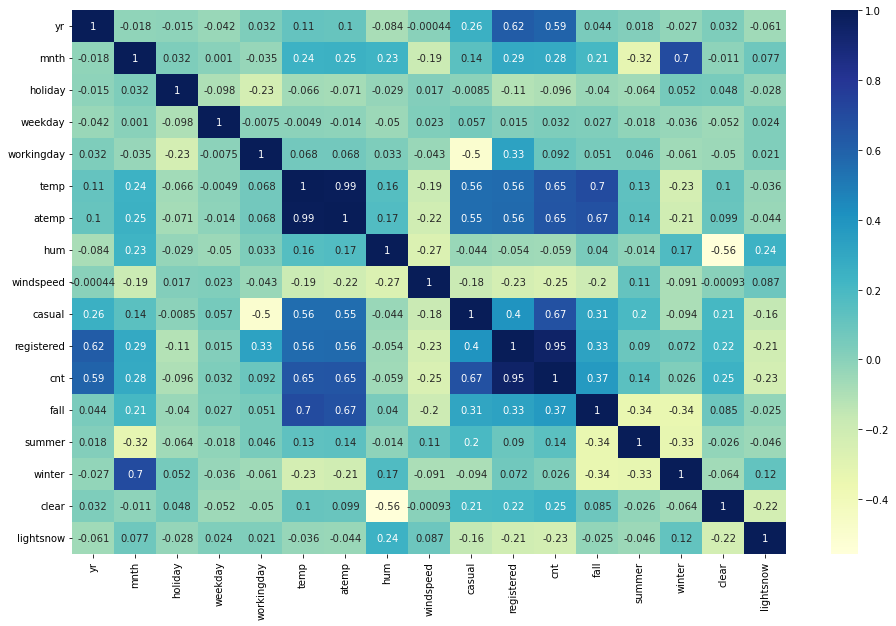

In [27]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Dividing into X and Y sets for the model building

In [28]:
y_train = df_train.pop('cnt')
X_train = df_train

# Building our model
we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [29]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [30]:
# build a model with all variables
X_train_sm=sm.add_constant(X_train)

# create a model
lr=sm.OLS(y_train, X_train_sm)

#fit 
lr_model=lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.373e+30
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:17:01   Log-Likelihood:                 17252.
No. Observations:                 510   AIC:                        -3.447e+04
Df Residuals:                     493   BIC:                        -3.440e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.465e-16   1.92e-16     -4.417      0.000   -1.22e-15    -4.7e-16
yr         -3.747e-16   7.68e-17     -4.877      0.000   -5.26e-16   -2.24e-16
mnth        7.373e-16    1.4e-16      5.279      0.000    4.63e-16    1.01e-15
holiday     -1.11e-16   1.49e-16     -0.747      0.455   -4.03e-16    1.81e-16
weekday     1.527e-16   6.83e-17      2.237      0.026    1.86e-17    2.87e-16
workingday -2.359e-16   8.83e-17     -2.673      0.008   -4.09e-16   -6.25e-17
temp         1.11e-15   7.59e-16      1.464      0.144    -3.8e-16     2.6e-15
atemp               0   7.66e-16          0      1.000   -1.51e-15    1.51e-15
hum         4.163e-16   2.13e-16      1.959      0.051   -1.29e-18    8.34e-16
windspeed   2.082e-16   1.52e-16      1.367      0.172   -9.11e-17    5.07e-16
casual         0.3775   2.16e-16   1.75e+15      0.000       0.377       0.377
registered     0.7968   2.57e-16    3.1e+15      0.000       0.797       0.797
fall        -1.18e-16   1.26e-16     -0.938      0.349   -3.65e-16    1.29e-16
summer     -1.804e-16   8.89e-17     -2.030      0.043   -3.55e-16   -5.78e-18
winter     -5.013e-16   1.26e-16     -3.982      0.000   -7.49e-16   -2.54e-16
clear        1.11e-16   6.03e-17      1.840      0.066   -7.54e-18     2.3e-16
lightsnow   3.036e-16   1.47e-16      2.059      0.040    1.39e-17    5.93e-16
==============================================================================
Omnibus:                       50.661   Durbin-Watson:                   1.453
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.460
Skew:                           0.008   Prob(JB):                     0.000439
Kurtosis:                       2.147   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
X=X_train.drop('atemp',axis=1)

In [32]:
#create  another model
X_train_sm=sm.add_constant(X)

# create a model
lr=sm.OLS(y_train, X_train_sm)

#fit 
lr_model=lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.297e+30
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:17:02   Log-Likelihood:                 16829.
No. Observations:                 510   AIC:                        -3.363e+04
Df Residuals:                     494   BIC:                        -3.356e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -7.98e-16   4.38e-16     -1.821      0.069   -1.66e-15    6.28e-17
yr         -2.567e-16   1.76e-16     -1.461      0.145   -6.02e-16    8.86e-17
mnth        1.475e-16    3.2e-16      0.461      0.645   -4.81e-16    7.76e-16
holiday    -1.388e-17    3.4e-16     -0.041      0.967   -6.82e-16    6.54e-16
weekday    -1.318e-16   1.56e-16     -0.845      0.398   -4.38e-16    1.75e-16
workingday  8.327e-17   2.02e-16      0.412      0.680   -3.13e-16     4.8e-16
temp       -1.096e-15   5.06e-16     -2.166      0.031   -2.09e-15   -1.02e-16
hum         1.374e-15   4.86e-16      2.826      0.005    4.19e-16    2.33e-15
windspeed   8.327e-16   3.43e-16      2.428      0.016    1.59e-16    1.51e-15
casual         0.3775   4.94e-16   7.64e+14      0.000       0.377       0.377
registered     0.7968   5.88e-16   1.36e+15      0.000       0.797       0.797
fall          3.4e-16   2.86e-16      1.188      0.235   -2.22e-16    9.02e-16
summer      9.021e-17   2.03e-16      0.443      0.658    -3.1e-16     4.9e-16
winter     -3.123e-16   2.88e-16     -1.084      0.279   -8.78e-16    2.54e-16
clear       1.457e-16   1.38e-16      1.055      0.292   -1.26e-16    4.17e-16
lightsnow    4.58e-16   3.37e-16      1.358      0.175   -2.04e-16    1.12e-15
==============================================================================
Omnibus:                        0.120   Durbin-Watson:                   0.232
Prob(Omnibus):                  0.942   Jarque-Bera (JB):                0.216
Skew:                          -0.014   Prob(JB):                        0.898
Kurtosis:                       2.903   Cond. No.                         28.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,registered,43.63
5,temp,33.64
1,mnth,13.93
6,hum,13.42
4,workingday,10.19
8,casual,9.80
10,fall,8.32
12,winter,7.93
0,yr,6.06
7,windspeed,4.34


In [34]:
X=X.drop(['holiday','registered','casual'],axis=1)

In [35]:
#create  another model
X_train_sm=sm.add_constant(X)

# create a model
lr=sm.OLS(y_train, X_train_sm)

#fit 
lr_model=lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     204.2
Date:                Thu, 04 Aug 2022   Prob (F-statistic):          2.63e-183
Time:                        20:17:04   Log-Likelihood:                 492.81
No. Observations:                 510   AIC:                            -959.6
Df Residuals:                     497   BIC:                            -904.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1078      0.035      3.099      0.002       0.039       0.176
yr             0.2323      0.008     27.612      0.000       0.216       0.249
mnth           0.0127      0.026      0.492      0.623      -0.038       0.064
weekday        0.0511      0.012      4.110      0.000       0.027       0.075
workingday     0.0236      0.009      2.650      0.008       0.006       0.041
temp           0.4935      0.034     14.392      0.000       0.426       0.561
hum           -0.1270      0.039     -3.251      0.001      -0.204      -0.050
windspeed     -0.1811      0.027     -6.803      0.000      -0.233      -0.129
fall           0.0701      0.023      3.046      0.002       0.025       0.115
summer         0.1187      0.016      7.591      0.000       0.088       0.149
winter         0.1548      0.022      6.967      0.000       0.111       0.198
clear          0.0561      0.011      5.141      0.000       0.035       0.078
lightsnow     -0.1892      0.026     -7.321      0.000      -0.240      -0.138
==============================================================================
Omnibus:                       79.503   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.562
Skew:                          -0.757   Prob(JB):                     7.73e-49
Kurtosis:                       5.852   Cond. No.                         24.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,temp,23.33
1,mnth,13.82
5,hum,12.86
7,fall,8.15
9,winter,7.15
6,windspeed,4.03
8,summer,3.54
2,weekday,3.03
3,workingday,3.02
10,clear,2.80


In [37]:
X=X.drop('mnth',axis=1)# model is over fitting due to this feature

In [38]:
#create  another model
X_train_sm=sm.add_constant(X)

# create a model
lr=sm.OLS(y_train, X_train_sm)

#fit 
lr_model=lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     223.1
Date:                Thu, 04 Aug 2022   Prob (F-statistic):          1.94e-184
Time:                        20:17:07   Log-Likelihood:                 492.68
No. Observations:                 510   AIC:                            -961.4
Df Residuals:                     498   BIC:                            -910.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1084      0.035      3.122      0.002       0.040       0.177
yr             0.2321      0.008     27.635      0.000       0.216       0.249
weekday        0.0514      0.012      4.145      0.000       0.027       0.076
workingday     0.0234      0.009      2.639      0.009       0.006       0.041
temp           0.4942      0.034     14.436      0.000       0.427       0.561
hum           -0.1252      0.039     -3.222      0.001      -0.202      -0.049
windspeed     -0.1808      0.027     -6.798      0.000      -0.233      -0.129
fall           0.0752      0.021      3.667      0.000       0.035       0.115
summer         0.1204      0.015      7.888      0.000       0.090       0.150
winter         0.1636      0.013     12.519      0.000       0.138       0.189
clear          0.0564      0.011      5.180      0.000       0.035       0.078
lightsnow     -0.1897      0.026     -7.350      0.000      -0.240      -0.139
==============================================================================
Omnibus:                       79.666   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.641
Skew:                          -0.758   Prob(JB):                     4.51e-49
Kurtosis:                       5.860   Cond. No.                         23.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,23.28
4,hum,12.23
6,fall,6.49
5,windspeed,4.02
7,summer,3.38
1,weekday,3.02
2,workingday,3.02
9,clear,2.77
8,winter,2.48
0,yr,2.04


In [40]:
X=X.drop('hum',axis=1)

In [41]:
#create  another model
X_train_sm=sm.add_constant(X)

# create a model
lr=sm.OLS(y_train, X_train_sm)

#fit 
lr_model=lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     239.8
Date:                Thu, 04 Aug 2022   Prob (F-statistic):          2.04e-183
Time:                        20:17:09   Log-Likelihood:                 487.42
No. Observations:                 510   AIC:                            -952.8
Df Residuals:                     499   BIC:                            -906.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0155      0.020      0.794      0.428      -0.023       0.054
yr             0.2352      0.008     27.931      0.000       0.219       0.252
weekday        0.0552      0.012      4.437      0.000       0.031       0.080
workingday     0.0238      0.009      2.660      0.008       0.006       0.041
temp           0.4678      0.034     13.944      0.000       0.402       0.534
windspeed     -0.1557      0.026     -6.066      0.000      -0.206      -0.105
fall           0.0821      0.021      3.988      0.000       0.042       0.123
summer         0.1230      0.015      7.998      0.000       0.093       0.153
winter         0.1595      0.013     12.151      0.000       0.134       0.185
clear          0.0768      0.009      8.608      0.000       0.059       0.094
lightsnow     -0.2041      0.026     -7.957      0.000      -0.255      -0.154
==============================================================================
Omnibus:                       77.395   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.312
Skew:                          -0.747   Prob(JB):                     3.54e-46
Kurtosis:                       5.760   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,16.78
5,fall,6.22
4,windspeed,3.70
6,summer,3.36
1,weekday,2.84
2,workingday,2.81
8,clear,2.68
7,winter,2.36
0,yr,2.03
9,lightsnow,1.11


In [43]:
X=X.drop('fall',axis=1)

In [44]:
#create  another model
X_train_sm=sm.add_constant(X)

# create a model
lr=sm.OLS(y_train, X_train_sm)

#fit 
lr_model=lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.0
Date:                Thu, 04 Aug 2022   Prob (F-statistic):          3.02e-181
Time:                        20:17:11   Log-Likelihood:                 479.42
No. Observations:                 510   AIC:                            -938.8
Df Residuals:                     500   BIC:                            -896.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0018      0.020      0.091      0.928      -0.037       0.040
yr             0.2333      0.009     27.340      0.000       0.216       0.250
weekday        0.0560      0.013      4.429      0.000       0.031       0.081
workingday     0.0243      0.009      2.668      0.008       0.006       0.042
temp           0.5760      0.020     28.775      0.000       0.537       0.615
windspeed     -0.1649      0.026     -6.358      0.000      -0.216      -0.114
summer         0.0775      0.010      7.401      0.000       0.057       0.098
winter         0.1286      0.011     11.958      0.000       0.107       0.150
clear          0.0756      0.009      8.352      0.000       0.058       0.093
lightsnow     -0.2008      0.026     -7.718      0.000      -0.252      -0.150
==============================================================================
Omnibus:                       64.695   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.521
Skew:                          -0.650   Prob(JB):                     5.12e-36
Kurtosis:                       5.441   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,4.90
4,windspeed,3.54
1,weekday,2.83
2,workingday,2.81
7,clear,2.66
0,yr,2.02
5,summer,1.50
6,winter,1.37
8,lightsnow,1.11


In [46]:
X=X.drop('windspeed',axis=1)

In [47]:
#create  another model
X_train_sm=sm.add_constant(X)

# create a model
lr=sm.OLS(y_train, X_train_sm)

#fit 
lr_model=lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     263.4
Date:                Thu, 04 Aug 2022   Prob (F-statistic):          4.68e-174
Time:                        20:17:13   Log-Likelihood:                 459.60
No. Observations:                 510   AIC:                            -901.2
Df Residuals:                     501   BIC:                            -863.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0647      0.017     -3.782      0.000      -0.098      -0.031
yr             0.2318      0.009     26.166      0.000       0.214       0.249
weekday        0.0543      0.013      4.137      0.000       0.028       0.080
workingday     0.0267      0.009      2.827      0.005       0.008       0.045
temp           0.6044      0.020     29.824      0.000       0.565       0.644
summer         0.0705      0.011      6.520      0.000       0.049       0.092
winter         0.1364      0.011     12.290      0.000       0.115       0.158
clear          0.0733      0.009      7.804      0.000       0.055       0.092
lightsnow     -0.2187      0.027     -8.142      0.000      -0.272      -0.166
==============================================================================
Omnibus:                       60.875   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.858
Skew:                          -0.625   Prob(JB):                     1.29e-32
Kurtosis:                       5.312   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
X=X.drop('workingday',axis=1)

In [49]:
#create  another model
X_train_sm=sm.add_constant(X)

# create a model
lr=sm.OLS(y_train, X_train_sm)

#fit 
lr_model=lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     295.8
Date:                Thu, 04 Aug 2022   Prob (F-statistic):          1.37e-173
Time:                        20:17:14   Log-Likelihood:                 455.56
No. Observations:                 510   AIC:                            -895.1
Df Residuals:                     502   BIC:                            -861.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0475      0.016     -2.951      0.003      -0.079      -0.016
yr             0.2324      0.009     26.069      0.000       0.215       0.250
weekday        0.0539      0.013      4.079      0.000       0.028       0.080
temp           0.6076      0.020     29.824      0.000       0.568       0.648
summer         0.0712      0.011      6.538      0.000       0.050       0.093
winter         0.1351      0.011     12.099      0.000       0.113       0.157
clear          0.0719      0.009      7.610      0.000       0.053       0.090
lightsnow     -0.2173      0.027     -8.036      0.000      -0.270      -0.164
==============================================================================
Omnibus:                       68.889   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.339
Skew:                          -0.720   Prob(JB):                     4.14e-35
Kurtosis:                       5.319   Cond. No.                         9.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
lr_model.params

const       -0.047493
yr           0.232437
weekday      0.053877
temp         0.607626
summer       0.071200
winter       0.135109
clear        0.071881
lightsnow   -0.217348
dtype: float64

# Step-4:Residual analysis

In [50]:
y_train_pred=lr_model.predict(X_train_sm)
y_train_pred

576    0.770101
426    0.507630
728    0.405754
482    0.550438
111    0.278736
         ...   
578    0.817714
53     0.174442
350    0.292316
79     0.313812
520    0.638815
Length: 510, dtype: float64

<AxesSubplot:>

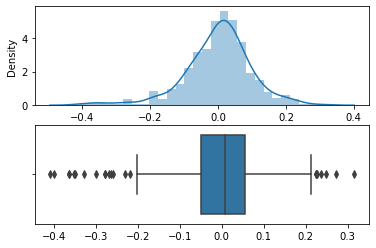

In [51]:
res=y_train - y_train_pred
plt.subplot(2,1,1)
sns.distplot(res)
plt.subplot(2,1,2)
sns.boxplot(res)

In [52]:
print(res.mean)

<bound method NDFrame._add_numeric_operations.<locals>.mean of 576    0.057557
426   -0.042375
728   -0.201658
482   -0.067465
111   -0.087641
         ...   
578    0.015120
53     0.043574
350    0.020270
79    -0.077388
520    0.164108
Length: 510, dtype: float64>


# Step-4: Predictions and Evaluations on the Test Set

In [53]:
#create a list of numeric variables
num_vars = ['mnth', 'weekday', 'temp','atemp','hum','windspeed','casual', 'registered','cnt']

#2.fit on data

df_test[num_vars]=scaler.transform(df_test[num_vars])

df_test.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,fall,summer,winter,clear,lightsnow
184,0,0.545455,1,0.166667,0,0.831783,0.769660,0.657364,0.084219,0.933557,0.427086,0.692706,1,0,0,0,0
535,1,0.454545,0,0.500000,1,0.901354,0.842587,0.610133,0.153728,0.265163,0.767976,0.712034,0,1,0,1,0
299,0,0.818182,0,0.666667,1,0.511964,0.496145,0.837699,0.334206,0.072539,0.346376,0.303382,0,0,1,0,0
221,0,0.636364,0,0.500000,1,0.881625,0.795343,0.437098,0.339570,0.268820,0.559630,0.547400,1,0,0,1,0
152,0,0.454545,0,0.666667,1,0.817246,0.741471,0.314298,0.537414,0.223712,0.608143,0.569029,0,1,0,1,0


In [54]:
df_test.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,fall,summer,winter,clear,lightsnow
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.499174,0.036364,0.502273,0.700000,0.558718,0.532847,0.638221,0.313293,0.266436,0.529076,0.522154,0.245455,0.263636,0.236364,0.654545,0.027273
std,0.500809,0.311120,0.187620,0.330843,0.459303,0.233187,0.217401,0.148694,0.159584,0.216751,0.219300,0.219163,0.431338,0.441609,0.425817,0.476601,0.163248
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.002133,0.059486,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.166667,0.000000,0.355429,0.344870,0.529197,0.198843,0.102484,0.359190,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.454545,0.000000,0.500000,1.000000,0.558172,0.544652,0.625590,0.300126,0.225236,0.527577,0.524678,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.727273,0.000000,0.833333,1.000000,0.755981,0.713308,0.743798,0.402718,0.361780,0.667088,0.677750,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.038708,0.985273,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
y_test = df_test.pop('cnt')
X_test = df_test

In [56]:
col1=X.columns
col1

Index(['yr', 'weekday', 'temp', 'summer', 'winter', 'clear', 'lightsnow'], dtype='object')

In [57]:
X_test=X_test[col1]

In [58]:
# add a constant

X_test_sm=sm.add_constant(X_test)
X_test_sm.head()

,const,yr,weekday,temp,summer,winter,clear,lightsnow
184,1.0,0,0.166667,0.831783,0,0,0,0
535,1.0,1,0.500000,0.901354,1,0,1,0
299,1.0,0,0.666667,0.511964,0,1,0,0
221,1.0,0,0.500000,0.881625,0,0,1,0
152,1.0,0,0.666667,0.817246,1,0,1,0


In [59]:
#predictions
y_test_pred=lr_model.predict(X_test_sm)

In [60]:
#evaluate the model
r2=r2_score(y_true=y_test, y_pred=y_test_pred)
r2

0.7955415418493403

In [61]:
X_test.shape

(220, 7)

In [62]:
# n is number of rows in X
n = X_test.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]
# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.788790555023611

# Final Result Comparison between train and test sets:
- Train R^2 :0.805
- Train Adjusted R^2 :0.802
- Test R^2 :0.795
- Test Adjusted R^2 :0.788


In [64]:
lr_model.params

const       -0.047493
yr           0.232437
weekday      0.053877
temp         0.607626
summer       0.071200
winter       0.135109
clear        0.071881
lightsnow   -0.217348
dtype: float64

# Conclusions
 
- Temperature: Affecting the bike rental the maximum, A coefficient of (0.60) indicates that a unit increase in temp variable increases the bike hire numbers 

- lightsnow weather: A negative coeffcient of (-0.21) indicating negative impact, which means with the increase in lightsnow weather condition, people generally don't purchase bikes.

- year: With increase in year [from 2018 to 2019], sales have increased, which implies positive impact, the coeff value is also: 0.23

- weather: a clear weather with coeffient of 0.07 implies weather affects the sale in positive manner, for good weather conditions, sales would increase 


# Best Fit Model Equation